## Instalaciones necesarias

In [1]:
##Instalaciones necesarias 
!pip install dpcpp-cpp-rt
!pip install scikit-learn-intelex
!pip install dpctl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


## Importacion de librerias

> ! Importante !

> Llamar sklearnex.patch_sklearn(), antes de invocar al clasificador de sklearn sklearn.svm.SVC()

In [2]:
import dpctl
from sklearnex import patch_sklearn, config_context
patch_sklearn(['SVC'])
##
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
data=load_breast_cancer()
X = data['data']#scaler.fit_transform(data['data'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.5, random_state=0)#

In [4]:
r=[]
for i in range(0,4):
    a = time.time()
    clf = SVC(kernel='linear')
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))
    b = time.time()
    r.append(b-a)
print(r)
print('Tiempo en segundos',np.mean(r),)

0.9578947368421052
0.9578947368421052
0.9578947368421052
0.9578947368421052
[1.5227127075195312, 1.53389573097229, 1.4537642002105713, 1.4418442249298096]
Tiempo en segundos 1.4880542159080505


## Evaluar desempeño con 60,000 instancias

> 2 repeticiones del ejercicio

In [6]:
ruta = 'airline_standardscale.csv'
df=pd.read_csv(ruta)
labelencoder= LabelEncoder()
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1]) 
data=list()
data={'data':np.array(df.iloc[:,:-1]),'target':np.array(df.iloc[:,-1])}
X = data['data']#scaler.fit_transform(data['data'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.5, random_state=0)#
o , a = X_train.shape
print('# Observaciones: ',o,'Numero de Atributos:',a)

# Observaciones:  64743 Numero de Atributos: 18


In [7]:
r=[]
for i in range(0,2):
    a = time.time()
    svc = SVC(kernel='rbf')
    parameters = {'gamma':[0.005,0.05,0.5]}
    clasificador_svm = GridSearchCV(svc, parameters,n_jobs=-1,cv=3)
    clasificador_svm.fit(X_train,y_train)
    print(clasificador_svm.score(X_test,y_test))
    b = time.time()
    r.append(b-a)
print(r,'\n')
print('Tiempo promedio  de ejecución : ', np.mean(r))

0.9243790930433708
0.9243790930433708
[71.0037944316864, 69.33770108222961] 

Tiempo promedio  de ejecución :  70.17074775695801


## Comparacion al no paralelizar

> Reiniciar kernel y continuar

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time

In [2]:
ruta = 'airline_standardscale.csv'
df=pd.read_csv(ruta)
labelencoder= LabelEncoder()
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1]) 
data=list()
data={'data':np.array(df.iloc[:,:-1]),'target':np.array(df.iloc[:,-1])}
X = data['data']#scaler.fit_transform(data['data'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.5, random_state=0)#
o , a = X_train.shape
print('# Observaciones: ',o,'Numero de Atributos:',a)

# Observaciones:  64743 Numero de Atributos: 18


In [3]:
r=[]
for i in range(0,2):
    a = time.time()
    svc = SVC(kernel='rbf')
    parameters = {'gamma':[0.005,0.05,0.5]}
    clasificador_svm = GridSearchCV(svc, parameters,n_jobs=-1,cv=3)
    clasificador_svm.fit(X_train,y_train)
    print(clasificador_svm.score(X_test,y_test))
    b = time.time()
    r.append(b-a)
print(r,'\n')
print('Tiempo promedio  de ejecución : ', np.mean(r))

0.9243636475966885
0.9243636475966885
[1020.8426647186279, 1010.4952232837677] 

Tiempo promedio  de ejecución :  1015.6689440011978


## Grafica de comparación

In [4]:
import matplotlib.pyplot as plt

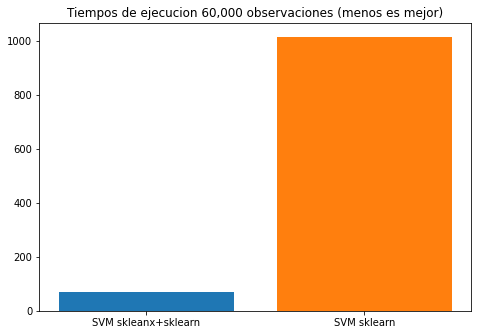

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
procedimiento = ['SVM skleanx+sklearn', 'SVM sklearn']
tiempos = [70.17, np.mean(r)]
ax.bar(procedimiento[0],tiempos[0])
ax.bar(procedimiento[1],tiempos[1])
ax.set_title('Tiempos de ejecucion 60,000 observaciones (menos es mejor)')
plt.show()

In [9]:
# Experimento realizado en una maquina con 8 procesadores (vcpu)
!lscpu -p

# The following is the parsable format, which can be fed to other
# programs. Each different item in every column has an unique ID
# starting from zero.
# CPU,Core,Socket,Node,,L1d,L1i,L2,L3
0,0,0,0,,0,0,0,0
1,1,0,0,,1,1,1,1
2,2,0,0,,2,2,2,2
3,3,0,0,,3,3,3,3
4,4,0,0,,4,4,4,4
5,5,0,0,,5,5,5,5
6,6,0,0,,6,6,6,6
7,7,0,0,,7,7,7,7
